Anhang
==

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import odr
from scipy.integrate import quad
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relativer Fehler:       ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler:       ', G - G_lit)
#    print('Verhältnis:', G / G_lit)
    print('Sigma-Abweichung:       ', np.abs(G - G_lit) 
          / sqrt(sig_G ** 2 + sig_G_lit ** 2),'\n')
    
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    

def ergebnis(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma), '+/-', np.round(sig_G, komma), einheit)
    

def ergebnis_large(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma))
    print('+/-'.rjust(len(name) + 2), np.round(sig_G, komma), einheit)
    

def fitparameter(name, G, sig_G, komma, einheit):
    return name + ' = ' + str(np.round(G, komma)) + '$\pm$' + str(np.round(sig_G, komma)) + einheit


def chi_sq(test_func, x_val, y_val, sig_y_val, popt, number):
    chi2_ = np.sum((test_func(x_val, *popt) - y_val) ** 2 
                   / sig_y_val ** 2)
    dof = len(y_val) - number
    chi2_red = chi2_ / dof

    print("chi2 =", chi2_)
    print("chi2_red =",chi2_red)

    prob = np.round(1 - chi2.cdf(chi2_,dof), 2) * 100 
    print("Wahrscheinlichkeit =", prob, "%\n")

In [2]:
def comma_to_float(valstr):
    return float(valstr.replace(',','.'))

Auswertung der unterschiedlichen Lichtquellen
--

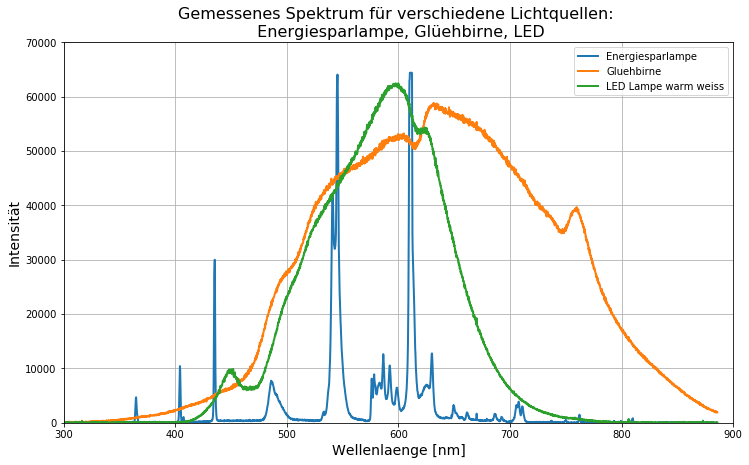

In [3]:
def extract_line(data):
    file = open('data/234/' + str(data), 'r')
    
    for i in range(17):
        trash = file.readline()
    
    lamb = np.array([])
    inten = np.array([])
        
    for line in file:
        line = line.strip()
        line = line.split()
            
        lamb = np.append(lamb, comma_to_float(line[0]))
        inten = np.append(inten, comma_to_float(line[1]))
        
    return lamb, inten
        
lamb_spar, inten_spar = extract_line('Energiesparlampe.txt')
lamb_glueh, inten_glueh = extract_line('Gluehbirne.txt')
lamb_led_lww, inten_led_lww = extract_line('LEDLampewarmweiss.txt')




# Plot ES, GB, LED
plt.figure(figsize = (12, 7))
plt.plot(lamb_spar, inten_spar, label = 'Energiesparlampe', linewidth = 2)
plt.plot(lamb_glueh, inten_glueh, label = 'Gluehbirne', linewidth = 2)
plt.plot(lamb_led_lww, inten_led_lww, label = 'LED Lampe warm weiss', linewidth = 2)
plt.title('Gemessenes Spektrum für verschiedene Lichtquellen:' 
          + ' \n Energiesparlampe, Glüehbirne, LED', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.legend()
plt.grid()
plt.ylim((2,70000)) 
plt.xlim((300,900))

plt.savefig('images/234/V234Diagramm0.png')



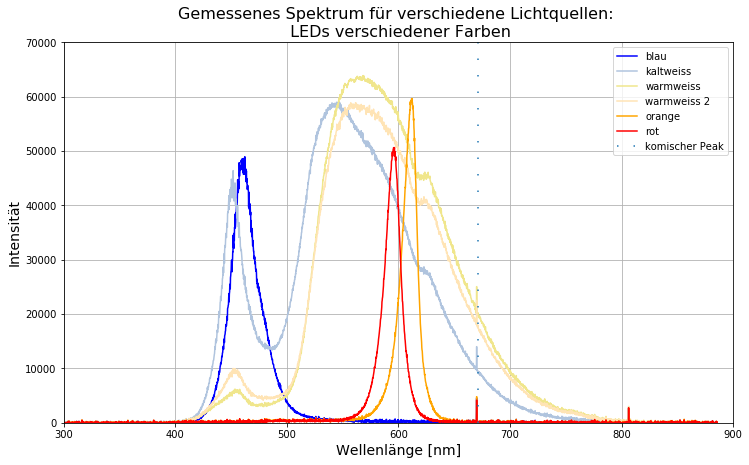

In [4]:
# Lamb, inten
lamb_blau, inten_blau = extract_line('LEDblau.txt')
lamb_kaltweiss, inten_kaltweiss = extract_line('LEDkaltweiss.txt')
lamb_orange, inten_orange = extract_line('LEDorange.txt')
lamb_rot, inten_rot = extract_line('LEDrot.txt')
lamb_warmweiss, inten_warmweiss = extract_line('LEDwarmweiss.txt')
lamb_warmweiss2, inten_warmweiss2 = extract_line('LEDwarmweiss2.txt')


# Plot Farben
plt.figure(figsize = (12, 7))
plt.plot(lamb_blau, inten_blau, color = 'blue', label = 'blau')
plt.plot(lamb_kaltweiss, inten_kaltweiss, color = 'lightsteelblue', 
         label = 'kaltweiss')
plt.plot(lamb_warmweiss, inten_warmweiss, color = 'khaki', 
         label = 'warmweiss')
plt.plot(lamb_warmweiss2, inten_warmweiss2, color = 'moccasin', 
         label = 'warmweiss 2')
plt.plot(lamb_orange, inten_orange, color = 'orange', label = 'orange')
plt.plot(lamb_rot, inten_rot, color = 'red', label = 'rot')
plt.axvline(671, label = 'komischer Peak', linestyle = (0, (1, 10)))
plt.title('Gemessenes Spektrum für verschiedene Lichtquellen:' 
          + ' \n LEDs verschiedener Farben', size = 16) 
plt.xlabel('Wellenlänge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.legend()
plt.grid()
plt.ylim((2,70000)) 
plt.xlim((300,900))

plt.savefig('images/234/V234Diagramm0b.png')

Auswertung des Sonnenspektrums
--

In [5]:
file_offen = open('data/234/untitled.txt', 'r')
file_zu = open('data/234/Fenster_geschlossen.txt', 'r')

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_offen.readline()
    trash_2 = file_zu.readline()


lamb_og = np.array([])
inten_og = np.array([])

for line in file_offen: # Extract lamb und inten
    line = line.strip()
    line = line.split()
    
    lamb_og = np.append(lamb_og, comma_to_float(line[0]))
    inten_og = np.append(inten_og, comma_to_float(line[1]))
    
    
lamb_mg = np.array([])
inten_mg = np.array([])    


for line in file_zu:
    line = line.strip()
    line = line.split()
    
    lamb_mg = np.append(lamb_mg, comma_to_float(line[0]))
    inten_mg = np.append(inten_mg, comma_to_float(line[1]))
    

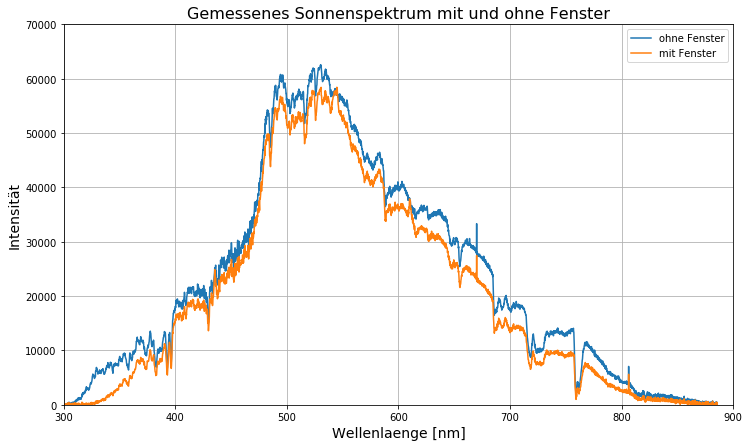

In [6]:
# Plot
plt.figure(figsize = (12, 7))
plt.plot(lamb_og, inten_og, label='ohne Fenster') 
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.legend()
plt.grid()
plt.ylim((2,70000)) 
plt.xlim((300,900))

plt.savefig('images/234/V234Diagramm1.png')

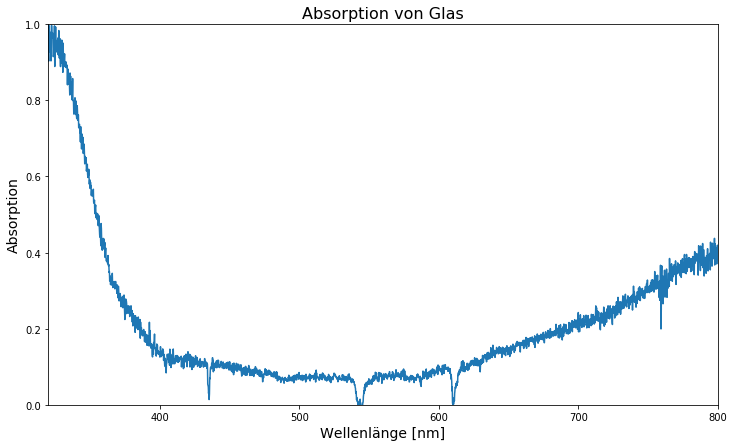

In [7]:
# Absorption von Glas
A = 1 - inten_mg / inten_og 

plt.figure(figsize = (12, 7))
plt.plot(lamb_mg, A) 
plt.title('Absorption von Glas', size = 16) 
plt.xlabel('Wellenlänge [nm]', size = 14) 
plt.ylabel('Absorption', size = 14) 
plt.ylim((0,1))
plt.xlim((320, 800))

plt.savefig('images/234/V234Diagramm2.png')

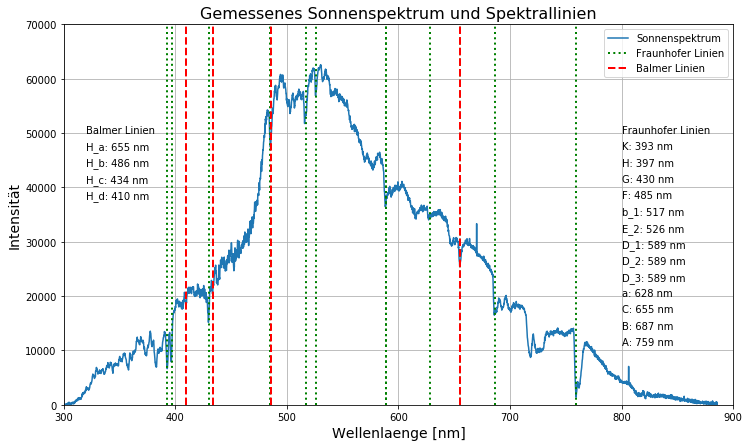

In [8]:
# Linien in der Sonne
def lines(serie_name, serie, col, style):
    plt.axvline(serie[0], label = serie_name, color = col, 
                linestyle = style, linewidth = 2)
    for i in serie[1:]:
        plt.axvline(i, color = col, linestyle = style, linewidth = 2)

# Fraunhofer
fraunhofer_names = np.array(['K', 'H', 'G', 'F','b_1', 'E_2','D_1','D_2',
                             'D_3','a', 'C', 'B',  'A'])
fraunhofer       = np.array([393, 397, 430, 485, 517,   526, 589,  589,  
                             589,  628, 655, 687, 759])
sig_lambda = 1

fraunhofer_lit = np.sort(np.array([759.4, 686.7, 656.3, 627.7, 589.6,589, 
                                   587.6, 527.0, 517.3, 486.1, 430.8, 396.9,
                                   393.4]))
sig_lambda_lit = 0.1

balmer_names = np.array(['H_a', 'H_b', 'H_c', 'H_d'])
balmer = np.array([655, 486, 434, 410])

balmer_lit = np.array([656.3, 486.1, 434, 410.1])

plt.figure(figsize = (12, 7))
plt.plot(lamb_og, inten_og, label = 'Sonnenspektrum') 
lines('Fraunhofer Linien', fraunhofer, 'green', ':')
plt.text(800, 50000, 'Fraunhofer Linien')
for i in range(len(fraunhofer)):
    plt.text(800, 50000 - 3000 * (i + 1), fraunhofer_names[i] 
             + ': ' + str(fraunhofer[i]) + ' nm')
lines('Balmer Linien', balmer, 'red', '--')
plt.text(320, 50000, 'Balmer Linien')
for i in range(len(balmer)):
    plt.text(320, 50000 - 3000 * (i + 1), balmer_names[i] 
             + ': ' + str(balmer[i]) + ' nm')

plt.title('Gemessenes Sonnenspektrum und Spektrallinien', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.legend()
plt.grid()
plt.ylim((2,70000)) 

a = 300
b = 900

plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm3.png')


Auswertung des Natriumspektrums
--

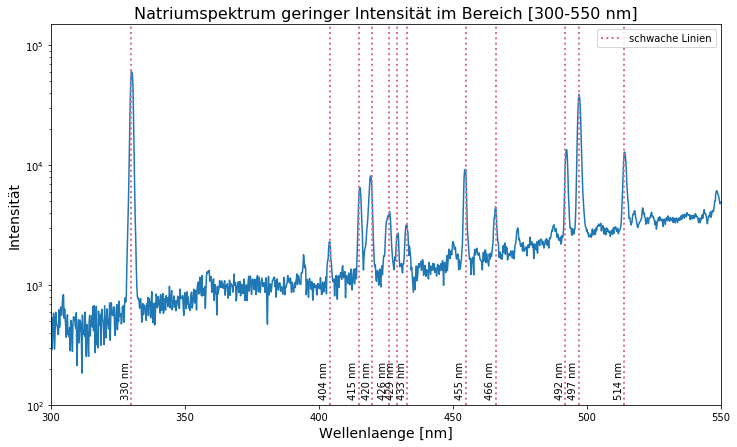

In [9]:
file_na_1 = open('data/234/Na_1.txt', 'r')

lamb_na_1 = np.array([])
inten_na_1 = np.array([])  

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_na_1.readline()


for line in file_na_1:
    line = line.strip()
    line = line.split()
    
    lamb_na_1 = np.append(lamb_na_1, comma_to_float(line[0]))
    inten_na_1 = np.append(inten_na_1, comma_to_float(line[1]))
    
schwach = np.array([330, 404, 415, 420, 426, 429, 433, 455, 466, 492, 497, 514])    
    
plt.figure(figsize = (12, 7))
plt.plot(lamb_na_1, inten_na_1)
lines('schwache Linien', schwach, 'palevioletred', ':')
for i in range(len(schwach)):
    plt.text(schwach[i] - 4, 2e2, str(schwach[i]) + ' nm', rotation = 'vertical')

a = 300
b = 550

plt.title('Natriumspektrum geringer Intensität im Bereich [' 
          + str(a) + '-' + str(b) + ' nm]', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((100, 1.5e5))
plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm4a.png')

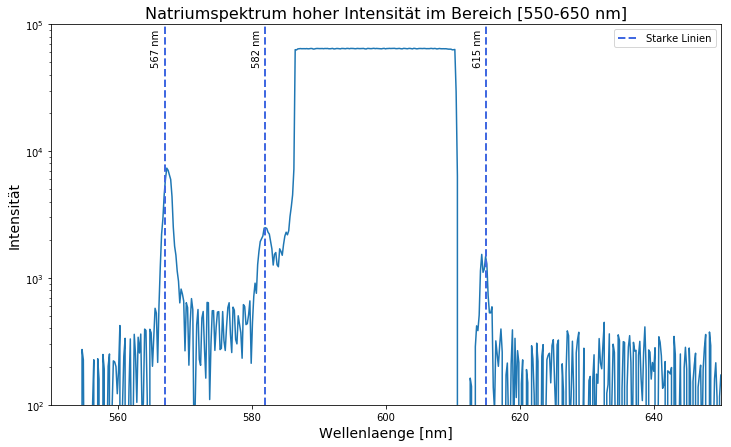

In [10]:
# Spektrum mit Zoom auf 550-650 nm, 'starke Linien'
file_na_2 = open('data/234/Na_2.txt', 'r')

lamb_na_2 = np.array([])
inten_na_2 = np.array([])  

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_na_2.readline()


for line in file_na_2:
    line = line.strip()
    line = line.split()
    
    lamb_na_2 = np.append(lamb_na_2, comma_to_float(line[0]))
    inten_na_2 = np.append(inten_na_2, comma_to_float(line[1]))
    
stark = np.array([567, 582, 615])

plt.figure(figsize = (12, 7))
plt.plot(lamb_na_2, inten_na_2)
lines('Starke Linien', stark, 'royalblue', '--')
for i in range(len(stark)):
    plt.text(stark[i] - 2, 8e4, str(stark[i]) + ' nm', rotation = 'vertical')

a = 550
b = 650

plt.title('Natriumspektrum hoher Intensität im Bereich [' 
          + str(a) + '-' + str(b) + ' nm]', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((100, 1e5))
plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm4b.png')

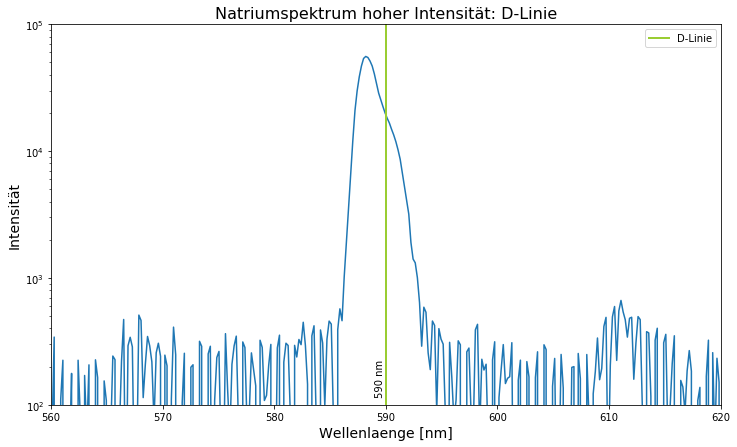

In [11]:
file_na_3 = open('data/234/Na_3.txt', 'r')

lamb_na_3 = np.array([])
inten_na_3 = np.array([])  

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_na_3.readline()


for line in file_na_3:
    line = line.strip()
    line = line.split()
    
    lamb_na_3 = np.append(lamb_na_3, comma_to_float(line[0]))
    inten_na_3 = np.append(inten_na_3, comma_to_float(line[1]))
    

neben_1 = np.array([426.2, 429.41, 432.8, 449.0, 466.03, 497.33])
neben_2 = np.array([445.2, 456.32, 474.21, 514.23])
haupt = np.array([330.17, 284.15])
extra = np.array([293.8, 394.3, 404.0, 415.4, 419.46, 569])
dline = np.array([590])

plt.figure(figsize = (12, 7))
plt.plot(lamb_na_3, inten_na_3)
lines('D-Linie', dline, 'yellowgreen', '-')
for i in range(len(dline)):
    plt.text(dline[i] - 1, 2e2, str(dline[i]) + ' nm', rotation = 'vertical')

plt.title('Natriumspektrum hoher Intensität: D-Linie', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((100, 1e5))
plt.xlim((560, 620))

plt.savefig('images/234/V234Diagramm4c.png')

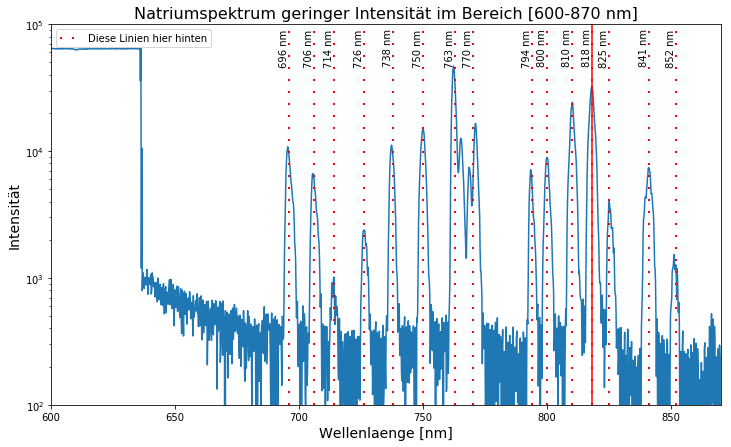

In [12]:
file_na_4 = open('data/234/Na_4.txt', 'r')

lamb_na_4 = np.array([])
inten_na_4 = np.array([])  

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_na_4.readline()


for line in file_na_4:
    line = line.strip()
    line = line.split()
    
    lamb_na_4 = np.append(lamb_na_4, comma_to_float(line[0]))
    inten_na_4 = np.append(inten_na_4, comma_to_float(line[1]))
    

dieseline = np.array([696, 706, 714, 726, 738, 750, 763, 770, 
                      794, 800, 810, 818, 825, 841, 852])

plt.figure(figsize = (12, 7))
plt.plot(lamb_na_4, inten_na_4)
lines('Diese Linien hier hinten', dieseline, 'red', (0, (1, 5)))
plt.axvline(818, color = 'red')
for i in range(len(dieseline)):
    plt.text(dieseline[i] - 4, 8e4, str(dieseline[i]) + ' nm', rotation = 'vertical')

a = 600
b = 870

plt.title('Natriumspektrum geringer Intensität im Bereich [' 
          + str(a) + '-' + str(b) + ' nm]', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((1e2, 1e5))
plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm4d.png')

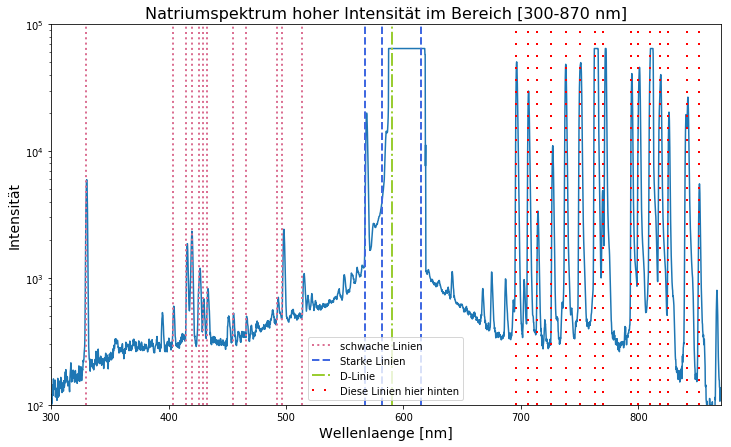

In [13]:
file_na_622 = open('data/234/Na_622.txt', 'r')

lamb_na_622 = np.array([])
inten_na_622 = np.array([])  

for i in range(17): # Entferne erste 17 Zeilen
    trash = file_na_622.readline()


for line in file_na_622:
    line = line.strip()
    line = line.split()
    
    lamb_na_622 = np.append(lamb_na_622, comma_to_float(line[0]))
    inten_na_622 = np.append(inten_na_622, comma_to_float(line[1]))
    
plt.figure(figsize = (12, 7))
plt.plot(lamb_na_622, inten_na_622)
lines('schwache Linien', schwach, 'palevioletred', ':')
lines('Starke Linien', stark, 'royalblue', '--')
lines('D-Linie', dline, 'yellowgreen', '-.')
lines('Diese Linien hier hinten', dieseline, 'red', (0, (1, 5)))

a = 300
b = 870

plt.title('Natriumspektrum hoher Intensität im Bereich [' 
          + str(a) + '-' + str(b) + ' nm]', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((100, 1e5))
plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm4e.png')

Zuordnung der gefundenen Linien zu Serien
--

In [14]:
# Erwartete Linien
# Erste Nebenserie
E_Ry = - 13.605 # eV
hc = 1.2398e3 # nm eV
n = 3
l = 818 # nm
sig_l = 1

lambda_1_n = np.array([])
sig_lambda_1_n = np.array([])
q_1_n = np.array([])

# Energie m = 3 Zustand
E_3p = (E_Ry / n ** 2) - hc / l
sig_E_3p = hc * (sig_l / l ** 2)
ergebnis('E_3p', E_3p, sig_E_3p, 3, '[eV]\n')

for m in range(3,13): 
    l = hc / (E_Ry / m ** 2 - E_3p)
    sig_l = hc / (E_Ry / m ** 2 - E_3p) ** 2 * sig_E_3p
    
    lambda_1_n = np.append(lambda_1_n, l) # Liste der WellenlÄngen
    sig_lambda_1_n = np.append(sig_lambda_1_n, sig_l)
    q_1_n = np.append(q_1_n, m) # Liste der Quantenzahlen
    ergebnis('lambda_' + str(m), l, sig_l, 1, '[nm]')
    
# lambda_1_n: m = 7, 8 nicht gefunden, entferne für spätere sigmas
mask = np.ones(len(lambda_1_n), dtype = bool) 
mask[[4, 5]] = False

lambda_1_n = lambda_1_n[mask, ...]
sig_lambda_1_n = sig_lambda_1_n[mask, ...]

E_3p = -3.027 +/- 0.002 [eV]

lambda_3 = 818.0 +/- 1.0 [nm]
lambda_4 = 569.5 +/- 0.5 [nm]
lambda_5 = 499.3 +/- 0.4 [nm]
lambda_6 = 468.0 +/- 0.3 [nm]
lambda_7 = 450.9 +/- 0.3 [nm]
lambda_8 = 440.5 +/- 0.3 [nm]
lambda_9 = 433.6 +/- 0.3 [nm]
lambda_10 = 428.8 +/- 0.3 [nm]
lambda_11 = 425.3 +/- 0.3 [nm]
lambda_12 = 422.7 +/- 0.3 [nm]


In [15]:
# Erste Nebenserie mit alternativer Wellenlänge (relevant in der Diskussion)
l = 820 # nm

lambda_1_n_b = np.array([])
sig_lambda_1_n_b = np.array([])
q_1_n_b = np.array([])

# Energie m = 3 Zustand
E_3p_b = (E_Ry / n ** 2) - hc / l
sig_E_3p_b = hc * (sig_l / l ** 2)
#ergebnis('E_3p', E_3p, sig_E_3p, 3, '[eV]\n')

for m in range(3,13): 
    l = hc / (E_Ry / m ** 2 - E_3p_b)
    sig_l = hc / (E_Ry / m ** 2 - E_3p_b) ** 2 * sig_E_3p_b
    
    lambda_1_n_b = np.append(lambda_1_n_b, l) # Liste der WellenlÄngen
    sig_lambda_1_n_b = np.append(sig_lambda_1_n_b, sig_l)
    q_1_n_b = np.append(q_1_n_b, m) # Liste der Quantenzahlen
    #ergebnis('lambda_' + str(m), l, sig_l, 1, '[nm]')
    
# lambda_1_n: m = 7, 8 nicht gefunden, entferne für spätere sigmas
mask = np.ones(len(lambda_1_n_b), dtype = bool) 
mask[[4, 5]] = False

lambda_1_n_b = lambda_1_n_b[mask, ...]
sig_lambda_1_n_b = sig_lambda_1_n_b[mask, ...]

In [16]:
# Zweite Nebenserie
l_g = 590
sig_l_g = 5

lambda_2_n = np.array([])
sig_lambda_2_n = np.array([])
q_2_n = np.array([])

# Energie Grundzustand
E_3s = E_3p - (hc / l_g) 
sig_E_3s = sqrt(sig_E_3p ** 2 + (hc * sig_l_g / (l_g ** 2)) ** 2) 
ergebnis('E_3s', E_3s, sig_E_3s, 3, '[eV]\n')

# Korrekturterm
Ds = 3 - sqrt(E_Ry / E_3s) 
sig_Ds = 0.5 * sig_E_3s * sqrt(E_Ry / (E_3s ** 3)) 
ergebnis('Ds', Ds, sig_Ds, 3, '\n')

for m in range(4,10): 
    l = hc / (E_Ry/(m - Ds) ** 2 - E_3p) 
    sig_l = sqrt((2 * E_Ry * hc / ((m - Ds) ** 3 
                                   * (E_Ry / (m - Ds) ** 2 - E_3p) ** 2) * 
                 sig_Ds) ** 2
                 + (hc / (E_Ry / (m - Ds) ** 2 - E_3p) ** 2 * sig_E_3p) ** 2 )
    lambda_2_n = np.append(lambda_2_n, l)
    sig_lambda_2_n = np.append(sig_lambda_2_n, sig_l)
    q_2_n = np.append(q_2_n, m)
    ergebnis('lambda_' + str(m), l, sig_l, 2, '[nm]')
    
    
# lambda_2_n: m = 4, 7, 9 nicht gefunden, entferne für spätere sigmas
# 7 muss allerdings bleiben für Fit
mask_2 = np.ones(len(lambda_2_n), dtype = bool) 
mask_2[[0, 5]] = False

lambda_2_n = lambda_2_n[mask_2, ...]
sig_lambda_2_n = sig_lambda_2_n[mask_2, ...]

E_3s = -5.129 +/- 0.018 [eV]

Ds = 1.371 +/- 0.003 

lambda_4 = 1171.3 +/- 5.14 [nm]
lambda_5 = 621.73 +/- 0.77 [nm]
lambda_6 = 518.24 +/- 0.44 [nm]
lambda_7 = 477.23 +/- 0.35 [nm]
lambda_8 = 456.2 +/- 0.31 [nm]
lambda_9 = 443.81 +/- 0.3 [nm]


In [17]:
# Hauptserie
lambda_H = np.array([])
sig_lambda_H = np.array([])
q_H = np.array([])

Dp = 3 - sqrt(E_Ry / E_3p) 
sig_Dp = (3 - Dp) / 2 * np.abs(sig_E_3p / E_3p) 
ergebnis('Dp', Dp, sig_Dp, 4, '\n')

for m in range(4,6):
    l = hc / (E_Ry / ((m - Dp) ** 2) - E_3s)
    sig_l = sqrt((2 * E_Ry * hc / ((m - Dp) ** 3 
                                   * (E_Ry / (m - Dp) ** 2 - E_3s) ** 2) * 
                 sig_Ds) ** 2
                 + (hc / (E_Ry / (m - Dp) ** 2 - E_3s) ** 2 * sig_E_3s) ** 2 )
    lambda_H = np.append(lambda_H, l)
    sig_lambda_H = np.append(sig_lambda_H, sig_l)
    q_H = np.append(q_H, m)
    ergebnis('lambda_' + str(m), l, sig_l, 1, '[nm]')
    
# lambda_H: m = 5 nicht gefunden, entferne für spätere sigmas
mask_H = np.ones(len(lambda_H), dtype = bool) 
mask_H[1] = False

lambda_H = lambda_H[mask_H, ...]
sig_lambda_H = sig_lambda_H[mask_H, ...]

Dp = 0.8801 +/- 0.0006 

lambda_4 = 332.3 +/- 1.6 [nm]
lambda_5 = 286.5 +/- 1.2 [nm]


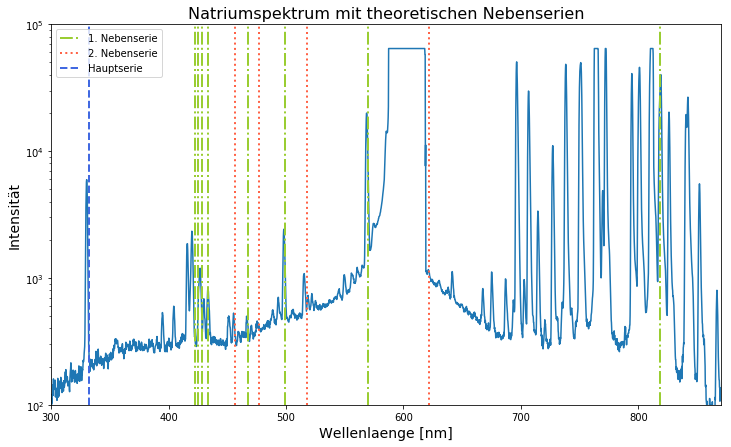

In [18]:
# Spektrum mit theoretischen Nebenserien
plt.figure(figsize = (12, 7))
plt.plot(lamb_na_622, inten_na_622)
lines('1. Nebenserie', lambda_1_n, 'yellowgreen', '-.')
lines('2. Nebenserie', lambda_2_n, 'tomato', ':')
lines('Hauptserie', lambda_H, 'royalblue', '--')

a = 300
b = 870

plt.title('Natriumspektrum mit theoretischen Nebenserien', size = 16) 
plt.xlabel('Wellenlaenge [nm]', size = 14) 
plt.ylabel('Intensität', size = 14)
plt.yscale('log')
plt.legend()
plt.ylim((100, 1e5))
plt.xlim((a, b))

plt.savefig('images/234/V234Diagramm4f.png')

Linzertorte
---

Ofen vorerhitzt auf 180ºC

Mehl
Mandelmehl
Zimt
Backpulver
werden in die Schüsel reingetan

Butter und Brauner Zucker werden brutal geschlagen bis Mischung kremig

Mehlmischung
Butterkreme
werden in die Schüsel reingetan

Marmelade wird bei mittlerer Hitze gekocht und 5 min kühlen gelassen

Teig wird zu etwa 0.5 cm geknetet

Kuchen wird etwa 30-35 min gebacken, oder bis golden braun und Marmelade blubert


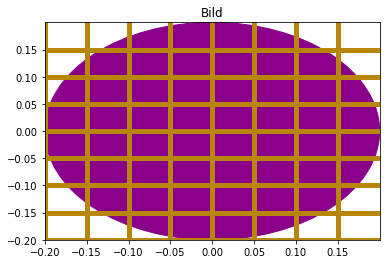

In [19]:
# Zutaten
ingr = np.array(['Mehl', 'Mandelmehl', 'Zimt', 'Backpulver', 'Salz', 
                 'Butter', 'Brauner Zucker', 'Marmelade'])
menge = np.array([190, 50, 3, 3, 3, 125, 135, 240]) # g

# Anleitung
def ofen(temperatur):
    print('Ofen vorerhitzt auf ' + str(temperatur) + 'ºC\n')
    
    
def marmelade(kuelzeit):
    print('Marmelade wird bei mittlerer Hitze gekocht und ' + str(kuelzeit) 
          + ' min kühlen gelassen\n')



def mischen(name, zutaten):
    for zutat in range(len(zutaten)):
        print(zutaten[zutat])
    print('werden in die Schüsel reingetan\n')
    return name
    
    
def kremieren(name, zutaten):
    print(zutaten[0] + ' und ' + zutaten[1] 
          + ' werden brutal geschlagen bis Mischung kremig\n')
    return name
    
    
def kneten(x):
    print('Teig wird zu etwa ' + str(x) + ' cm geknetet\n')
    


ofen(180)
mehlmisch = mischen('Mehlmischung', ingr[0:4])
buttermisch = kremieren('Butterkreme', ingr[5:7])
mehlbuttermisch = mischen('Teig', np.array([mehlmisch, buttermisch]))
marmelade(5)
kneten(.5)


major_ticks = np.arange(-0.2, 0.2, 0.05)

fig, ax = plt.subplots()
circle2 = plt.Circle((0, 0), 0.2, color='darkmagenta')
plt.title('Bild')
ax.add_patch(circle2)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
plt.grid(linewidth = 5, color = 'darkgoldenrod')
ax.set_ylim((-0.2, 0.2))
ax.set_xlim((-0.2, 0.2))
fig.show()

def backen(zeit):
    print('Kuchen wird etwa ' + zeit 
          + ' min gebacken, oder bis golden braun und Marmelade blubert')

    
backen('30-35')

Bestimmung der Serienenergien und l-abhängigen Korrekturfaktoren
--

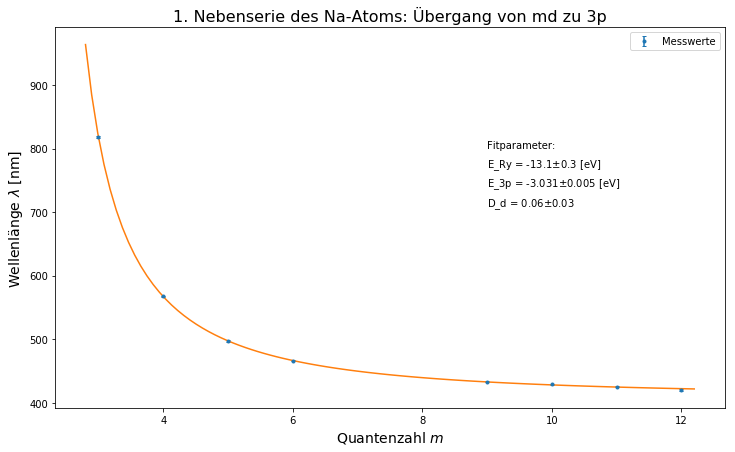

In [20]:
# Fit md -> 3p
m_md3p = np.array([3, 4, 5, 6, 9, 10, 11, 12])
lambda_md3p = np.array([818, 567, 497, 466, 433, 429, 425, 420])
sig_lambda_md3p = np.ones(len(lambda_md3p)) 

def fit_func(m, E_Ry, E_3p, D_d):
    return hc / (E_Ry / (m - D_d) ** 2 - E_3p)

p0 = [-13.6, -3, -0.02]
popt_1, pcov_1 = curve_fit(fit_func, m_md3p, lambda_md3p, 
                           sigma = sig_lambda_md3p, p0 = p0)

# Fitparameter
E_Ry_fit_1 = popt_1[0]
sig_E_Ry_fit_1 = sqrt(pcov_1[0, 0])
E_3p_fit_1 = popt_1[1]
sig_E_3p_fit_1 = sqrt(pcov_1[1, 1])
D_d_fit_1 = popt_1[2]
sig_D_d_fit_1 = sqrt(pcov_1[2, 2])

x=np.linspace(2.8, 12.2, 100)

# Plot
plt.figure(figsize = (12, 7)) 
plt.errorbar(m_md3p, lambda_md3p, yerr = sig_lambda_md3p, fmt = '.', capsize = 2,
            label = 'Messwerte') 
plt.plot(x, fit_func(x, *popt_1))
plt.text(9, 800, 'Fitparameter:')
plt.text(9, 770, fitparameter('E_Ry', E_Ry_fit_1, sig_E_Ry_fit_1, 1, ' [eV]'))
plt.text(9, 740, fitparameter('E_3p', E_3p_fit_1, sig_E_3p_fit_1, 3, ' [eV]'))
plt.text(9, 710, fitparameter('D_d', D_d_fit_1, sig_D_d_fit_1, 2, ''))
plt.title('1. Nebenserie des Na-Atoms: Übergang von md zu 3p', size = 16)
plt.xlabel('Quantenzahl $m$', size = 14) 
plt.ylabel('Wellenlänge $\\lambda$ [nm]', size = 14)
plt.legend()

plt.savefig('images/234/V234Diagramm5a.png')

In [21]:
# chi^2 Analyse
chi_sq(fit_func, m_md3p, lambda_md3p, sig_lambda_md3p, popt_1, 3)

chi2 = 5.634602732918731
chi2_red = 1.1269205465837462
Wahrscheinlichkeit = 34.0 %



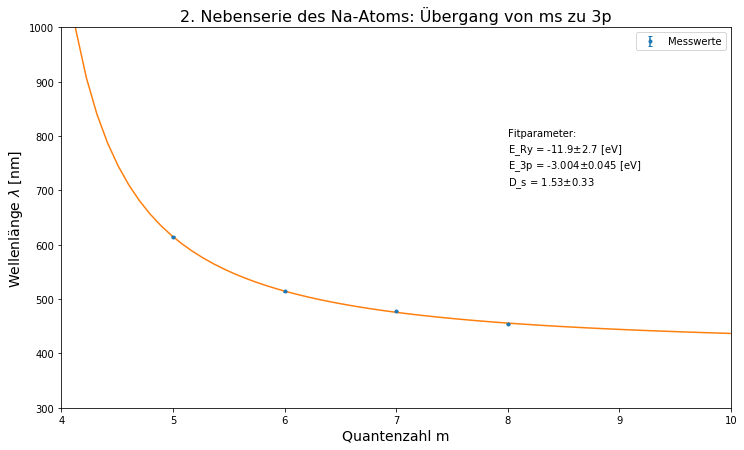

In [22]:
# Fit ms -> 3p
m_ms3p = np.array([5, 6, 7, 8])
lambda_ms3p = np.array([615, 514, 477.2, 455]) 
'''
Künstliches Hinzufügen der m = 7 Linie, weil sonst zu viele Parameter, 
nicht genug Werte
'''
sig_lambda_ms3p = np.ones(len(lambda_ms3p)) 

def fit_func(m, E_Ry, E_3p, D_d):
    return hc / (E_Ry / (m - D_d) ** 2 - E_3p)

p0 = [-13.6, -5, 1]
popt_2, pcov_2 = curve_fit(fit_func, m_ms3p, lambda_ms3p, 
                           sigma = sig_lambda_ms3p, p0 = p0)

# Fitparameter
E_Ry_fit_2 = popt_2[0]
sig_E_Ry_fit_2 = sqrt(pcov_2[0, 0])
E_3p_fit_2 = popt_2[1]
sig_E_3p_fit_2 = sqrt(pcov_2[1, 1])
D_s_fit_2 = popt_2[2]
sig_D_s_fit_2 = sqrt(pcov_2[2, 2])

x=np.linspace(2.8, 12.2, 100)

# Plot
plt.figure(figsize = (12, 7)) 
plt.errorbar(m_ms3p, lambda_ms3p, yerr = sig_lambda_ms3p, fmt = '.', capsize = 2,
            label = 'Messwerte') 
plt.plot(x, fit_func(x, *popt_2))
plt.text(8, 800, 'Fitparameter:')
plt.text(8, 770, fitparameter('E_Ry', E_Ry_fit_2, sig_E_Ry_fit_2, 1, ' [eV]'))
plt.text(8, 740, fitparameter('E_3p', E_3p_fit_2, sig_E_3p_fit_2, 3, ' [eV]'))
plt.text(8, 710, fitparameter('D_s', D_s_fit_2, sig_D_s_fit_2, 2, ''))
plt.title('2. Nebenserie des Na-Atoms: Übergang von ms zu 3p', size = 16)
plt.xlim((4, 10))
plt.ylim((300, 1000))
plt.xlabel('Quantenzahl m', size = 14) 
plt.ylabel('Wellenlänge $\\lambda$ [nm]', size = 14)
plt.legend()

plt.savefig('images/234/V234Diagramm5b.png')

In [23]:
# chi^2 Analyse
chi_sq(fit_func, m_ms3p, lambda_ms3p, sig_lambda_ms3p, popt_2, 3)

chi2 = 3.5716318071014905
chi2_red = 3.5716318071014905
Wahrscheinlichkeit = 6.0 %



Sigmas
--

Sonnenspektrum

In [25]:
# Vergleich der Fraunhofer Linien
fehler('Fraunhofer Linien', fraunhofer, sig_lambda, fraunhofer_lit, 0)

Fraunhofer Linien
Relativer Fehler:        [0.25445293 0.25188917 0.23255814 0.20618557 0.1934236  0.19011407
 0.16977929 0.16977929 0.16977929 0.15923567 0.15267176 0.14556041
 0.13175231]
Rel. Fehler (Vergleich): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Absoluter Fehler:        [-0.4  0.1 -0.8 -1.1 -0.3 -1.   1.4  0.  -0.6  0.3 -1.3  0.3 -0.4]
Sigma-Abweichung:        [0.4 0.1 0.8 1.1 0.3 1.  1.4 0.  0.6 0.3 1.3 0.3 0.4] 



In [26]:
# Balmer Serie
fehler('Balmer Serie', balmer, sig_lambda, balmer_lit, 0)

Balmer Serie
Relativer Fehler:        [0.15267176 0.20576132 0.23041475 0.24390244]
Rel. Fehler (Vergleich): [0. 0. 0. 0.]
Absoluter Fehler:        [-1.3 -0.1  0.  -0.1]
Sigma-Abweichung:        [1.3 0.1 0.  0.1] 



Natriumspektrum

In [27]:
# Erste Nebenserie
# lambda_1_n: theo
# lambda_md3p: exp
fehler('Erste Nebenserie', lambda_md3p, sig_lambda_md3p, lambda_1_n, sig_lambda_1_n)

Erste Nebenserie
Relativer Fehler:        [0.12224939 0.17636684 0.20120724 0.21459227 0.23094688 0.23310023
 0.23529412 0.23809524]
Rel. Fehler (Vergleich): [0.12224939 0.0851111  0.0746188  0.06993552 0.06480037 0.06408512
 0.063566   0.06317676]
Absoluter Fehler:        [ 0.         -2.49876465 -2.29230241 -1.95537575 -0.59480134  0.19109577
 -0.3353339  -2.73084633]
Sigma-Abweichung:        [0.         2.24854888 2.14806371 1.85838663 0.57262769 0.18426486
 0.32371105 2.63837558] 



In [28]:
# Erste Nebenserie mit alternativen Daten
fehler('Erste Nebenserie mit alternativen Daten', lambda_md3p, sig_lambda_md3p, lambda_1_n_b, sig_lambda_1_n_b)

Erste Nebenserie mit alternativen Daten
Relativer Fehler:        [0.12224939 0.17636684 0.20120724 0.21459227 0.23094688 0.23310023
 0.23529412 0.23809524]
Rel. Fehler (Vergleich): [0.03256922 0.02265815 0.01986074 0.01861249 0.01724406 0.01705348
 0.01691516 0.01681145]
Absoluter Fehler:        [-2.         -3.46745841 -3.03672512 -2.60922573 -1.15609846 -0.35787101
 -0.87543728 -3.26435131]
Sigma-Abweichung:        [1.93227685 3.43885017 3.02185987 2.59935742 1.15287208 0.35691553
 0.87317459 3.25611836] 



In [29]:
# Zweite Nebenserie
fehler('Zweite Nebenserie', lambda_ms3p, sig_lambda_ms3p, lambda_2_n, sig_lambda_2_n)

Zweite Nebenserie
Relativer Fehler:        [0.16260163 0.19455253 0.20955574 0.21978022]
Rel. Fehler (Vergleich): [0.12339003 0.08403458 0.07325034 0.06887503]
Absoluter Fehler:        [-6.73463591 -4.24373047 -0.0320105  -1.19667814]
Sigma-Abweichung:        [5.34338059 3.89077118 0.03021739 1.14164959] 



In [30]:
# Hauptserie
lambda_mp3s = 330
sig_lambda_mp3s = 1
fehler('Hauptserie', lambda_mp3s, sig_lambda_mp3s, lambda_H, sig_lambda_H)

Hauptserie
Relativer Fehler:        0.30303030303030304
Rel. Fehler (Vergleich): [0.48471199]
Absoluter Fehler:        [-2.29852861]
Sigma-Abweichung:        [1.21238694] 



Serienenergien

In [31]:
# Rydberg-Energie
fehler('Rydberg-Energie: 1. NS - Lit ', E_Ry_fit_1, sig_E_Ry_fit_1, E_Ry, 0)

Rydberg-Energie: 1. NS - Lit 
Relativer Fehler:        -2.5896665793294975
Rel. Fehler (Vergleich): -0.0
Absoluter Fehler:        0.49275983401194523
Sigma-Abweichung:        1.4511575073317156 



In [32]:
fehler('Rydberg-Energie: 2. NS - Lit', E_Ry_fit_2, sig_E_Ry_fit_2, E_Ry, 0)

Rydberg-Energie: 2. NS - Lit
Relativer Fehler:        -23.01382424759472
Rel. Fehler (Vergleich): -0.0
Absoluter Fehler:        1.6736820154583114
Sigma-Abweichung:        0.6095309140378529 



In [33]:
fehler('Rydberg-Energie: 1. NS - 2. NS', E_Ry_fit_1, sig_E_Ry_fit_1, E_Ry_fit_2, sig_E_Ry_fit_2)

Rydberg-Energie: 1. NS - 2. NS
Relativer Fehler:        -2.5896665793294975
Rel. Fehler (Vergleich): -23.01382424759472
Absoluter Fehler:        -1.1809221814463662
Sigma-Abweichung:        0.42682358964688294 



In [34]:
# Serienenergie
fehler('Serienenergie E_3p: 1. NS - Lit', E_3p_fit_1, sig_E_3p_fit_1, E_3p, sig_E_3p)

Serienenergie E_3p: 1. NS - Lit
Relativer Fehler:        -0.17716609662004004
Rel. Fehler (Vergleich): -0.061205080142107016
Absoluter Fehler:        -0.0032716975585564967
Sigma-Abweichung:        0.5760144265709591 



In [35]:
fehler('Serienenergie E_3p: 2. NS - Lit', E_3p_fit_2, sig_E_3p_fit_2, E_3p, sig_E_3p)

Serienenergie E_3p: 2. NS - Lit
Relativer Fehler:        -1.4960454107195604
Rel. Fehler (Vergleich): -0.061205080142107016
Absoluter Fehler:        0.022925857022761065
Sigma-Abweichung:        0.509631165296719 



In [36]:
fehler('Serienenergie: 1. NS - 2. NS', E_3p_fit_1, sig_E_3p_fit_1, E_3p_fit_2, sig_E_3p_fit_2)

Serienenergie: 1. NS - 2. NS
Relativer Fehler:        -0.17716609662004004
Rel. Fehler (Vergleich): -1.4960454107195604
Absoluter Fehler:        -0.02619755458131756
Sigma-Abweichung:        0.5787395232335217 



In [37]:
# Korrekturterme
fehler('D_s_2 - D_s_lit', D_s_fit_2, sig_D_s_fit_2, Ds, sig_Ds)

D_s_2 - D_s_lit
Relativer Fehler:        21.317823565446247
Rel. Fehler (Vergleich): 0.20732048086167204
Absoluter Fehler:        0.15392626969638168
Sigma-Abweichung:        0.47339664132005976 



In [38]:
fehler('D_p_1 - D_p_lit', D_d_fit_1, sig_D_d_fit_1, 0.000000000001, 0.00000000000001)

D_p_1 - D_p_lit
Relativer Fehler:        58.75795777993172
Rel. Fehler (Vergleich): 1.0
Absoluter Fehler:        0.058004015885407746
Sigma-Abweichung:        1.7018971349005958 

